In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from myLibraries.events import *
from myLibraries.queries import *

In [2]:
# QUESTION: why anr_year for controls?
# ISSUE: focal_control.csv contains 13614 authors, but only 5459 of are the the collaboration.csv
# ISSUE: of those 5459 there are only 1455 focal+control couples 
# ISSUE: The "start_year" indicated in the focal_control.csv doesen't match the one in publication data

In [3]:
YEARS = get_str_years_event()
EVENTS = get_collabs_event()


In [4]:
foc_con = get_all_granting_data()
granted = get_granted() # get just the granted data
not_granted = get_not_granted() #get just the not granted data

foc_con

,auth.id,group,focal,anr_year,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,start_year
0,6602860506,1,0,2010,0,0,0,0,0,0,...,4,11,11,11,11,11,11,11,11,1990
1,10143762200,10,1,2011,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,2003
2,12766889900,100,1,2016,0,0,0,0,0,0,...,20,20,20,20,40,40,40,40,40,2005
3,23569685800,100,0,2015,0,0,0,0,0,0,...,9,11,12,25,29,33,37,43,46,2007
4,24766427900,1000,1,2012,0,0,0,0,0,0,...,0,0,0,4,4,4,4,4,4,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5454,7005280084,992,0,2014,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,2003
5455,24740874700,994,1,2014,0,0,0,0,0,0,...,14,35,40,46,61,79,83,88,111,2008
5456,7003626217,994,0,2009,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,1996
5457,6602299637,996,0,2007,0,0,0,0,0,0,...,29,40,42,44,45,45,48,48,52,2001


In [5]:
groups = list(set(foc_con["group"])) # list of group IDs 
print("#groups with just one author", len(groups))

groups = [group for group in groups if len(foc_con[foc_con["group"]==group])>=2] # list of group IDs with both a focal and control 
print("#groups with both focal and controls", len(groups))

#groups with just one author 4004
#groups with both focal and controls 1455


In [6]:
# keep only focal+control couples

foc_con = foc_con[foc_con.group.isin(groups)]
granted = granted[granted.group.isin(groups)]
not_granted = not_granted[not_granted.group.isin(groups)]


#foc_con.to_csv("myDATA/grantingDATA/00-granting_DATA.csv")
#granted.to_csv("myDATA/grantingDATA/01-granted.csv")
#not_granted.to_csv("myDATA/grantingDATA/01-not_granted.csv")


foc_con.sort_values("group")

,auth.id,group,focal,anr_year,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,start_year
4366,7102002323,6,0,2015,0,0,0,0,0,0,...,8,10,15,25,26,32,32,34,38,2002
4365,10140643700,6,1,2014,0,0,0,0,0,0,...,12,28,35,44,53,64,67,80,86,2001
5271,10142501400,8,1,2012,0,0,0,0,0,0,...,19,24,24,31,32,32,38,41,48,2003
5272,7006104157,8,0,2006,0,0,0,0,0,0,...,30,30,49,49,49,49,49,49,49,1990
254,10239292700,13,1,2010,0,0,0,0,0,0,...,6,13,26,26,26,52,52,56,56,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5122,23974287400,6801,0,2014,0,0,0,0,0,0,...,7,11,17,19,22,24,24,24,24,2001
5124,9939279300,6804,1,2015,0,0,0,0,0,0,...,3,3,3,5,5,5,5,5,5,2002
5125,6601960478,6804,0,2013,0,0,2,2,2,5,...,42,45,52,52,52,52,53,56,56,1992
5127,48360905400,6805,0,2015,0,0,0,0,0,0,...,0,1,3,8,8,10,10,12,12,2011


In [7]:
anr_years = granted["anr_year"] 
start_years = granted["start_year"]

diff = []
for anr, start in zip(anr_years, start_years):
    diff.append(abs(anr-start))
    
print("the average absolute distance between starting and funding years is: ", np.average(diff))

the average absolute distance between starting and funding years is:  14.369759450171822


In [8]:
# Distribution of granted and not granted by starting year
print("year\t\t#granted\t#not_granted")
print("____\t\t________\t____________\n")
for y in YEARS:
    num_granted = len(granted[granted["start_year"] == int(y)])
    num_not_granted = len(not_granted[not_granted["start_year"] == int(y)])
    
    print(y+"\t\t"+str(num_granted)+"\t\t"+str(num_not_granted))


year		#granted	#not_granted
____		________	____________

1990		171		249
1991		84		78
1992		70		90
1993		72		95
1994		64		78
1995		56		77
1996		78		102
1997		75		72
1998		72		64
1999		56		67
2000		90		67
2001		82		55
2002		82		76
2003		74		53
2004		72		57
2005		79		53
2006		66		37
2007		34		33
2008		29		19
2009		30		13
2010		10		14
2011		6		5
2012		2		0
2013		0		1
2014		0		0
2015		0		0
2016		0		0
2017		0		0
2018		1		0


In [9]:
# Distribution of granted and not granted by anr year
print("year\t\t#granted\t#not_granted")
print("____\t\t________\t____________\n")
for y in YEARS:
    num_granted = len(granted[granted["anr_year"] == int(y)])
    num_not_granted = len(not_granted[not_granted["anr_year"] == int(y)])
    
    print(y+"\t\t"+str(num_granted)+"\t\t"+str(num_not_granted))
    

year		#granted	#not_granted
____		________	____________

1990		0		0
1991		0		0
1992		0		0
1993		0		0
1994		0		0
1995		0		0
1996		0		0
1997		0		0
1998		0		0
1999		0		0
2000		0		0
2001		0		0
2002		0		0
2003		0		0
2004		0		19
2005		0		43
2006		0		58
2007		0		71
2008		0		96
2009		0		110
2010		242		131
2011		257		144
2012		239		139
2013		190		198
2014		191		214
2015		179		232
2016		157		0
2017		0		0
2018		0		0


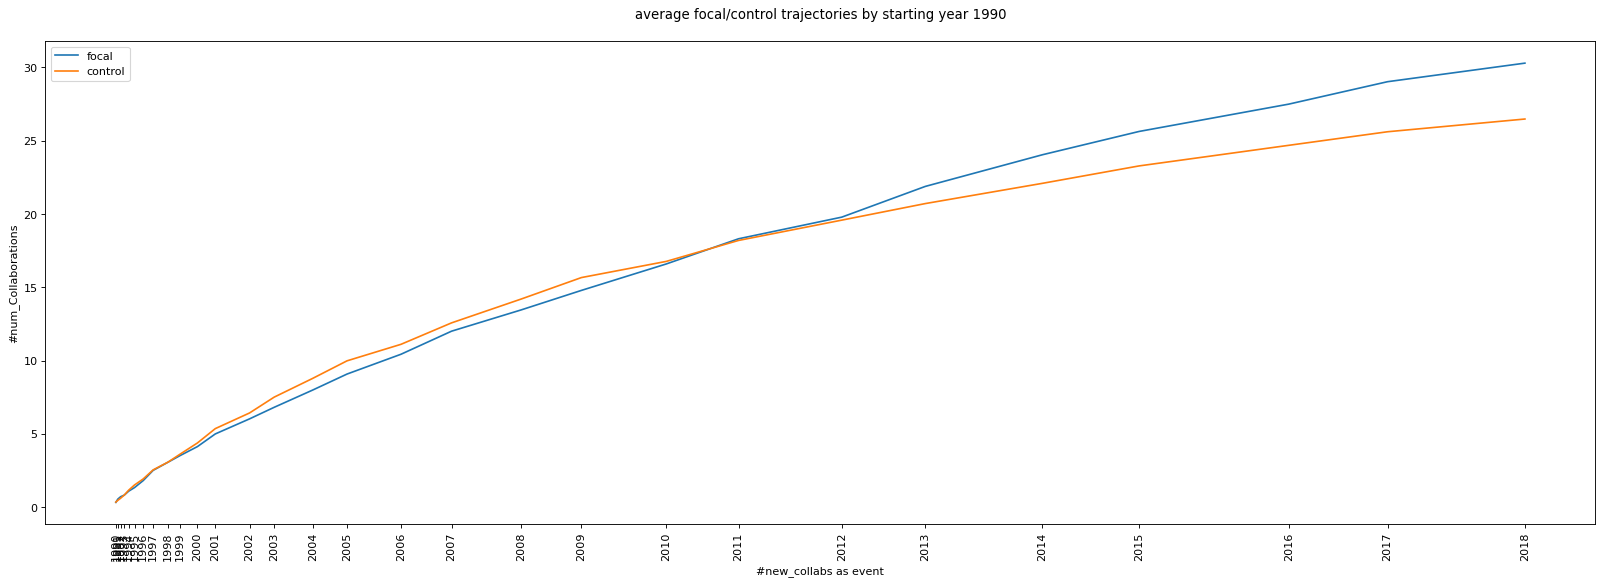

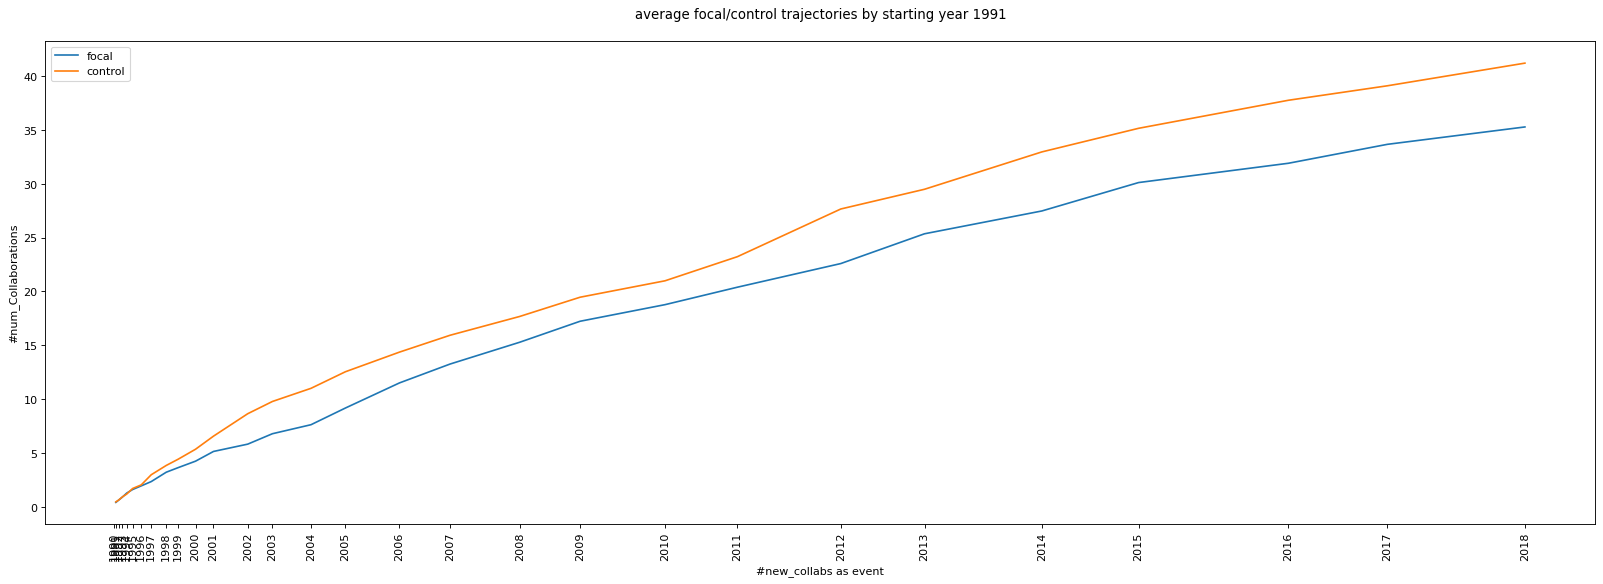

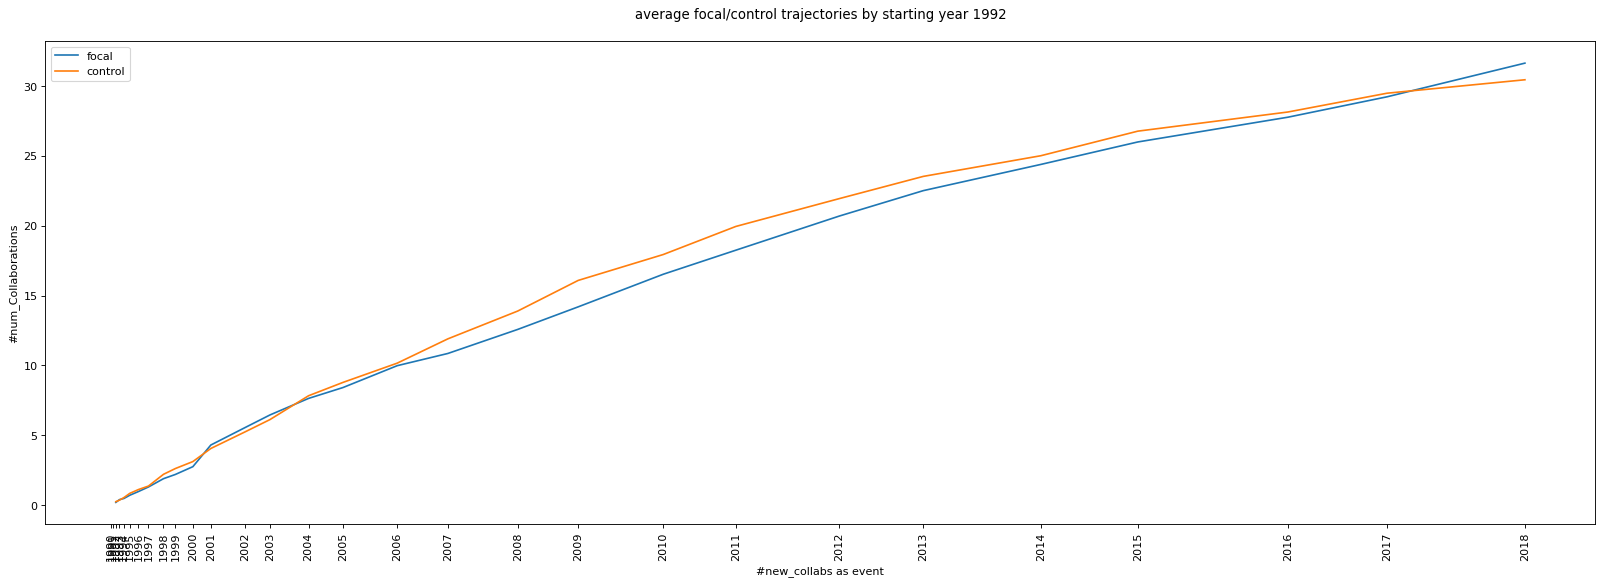

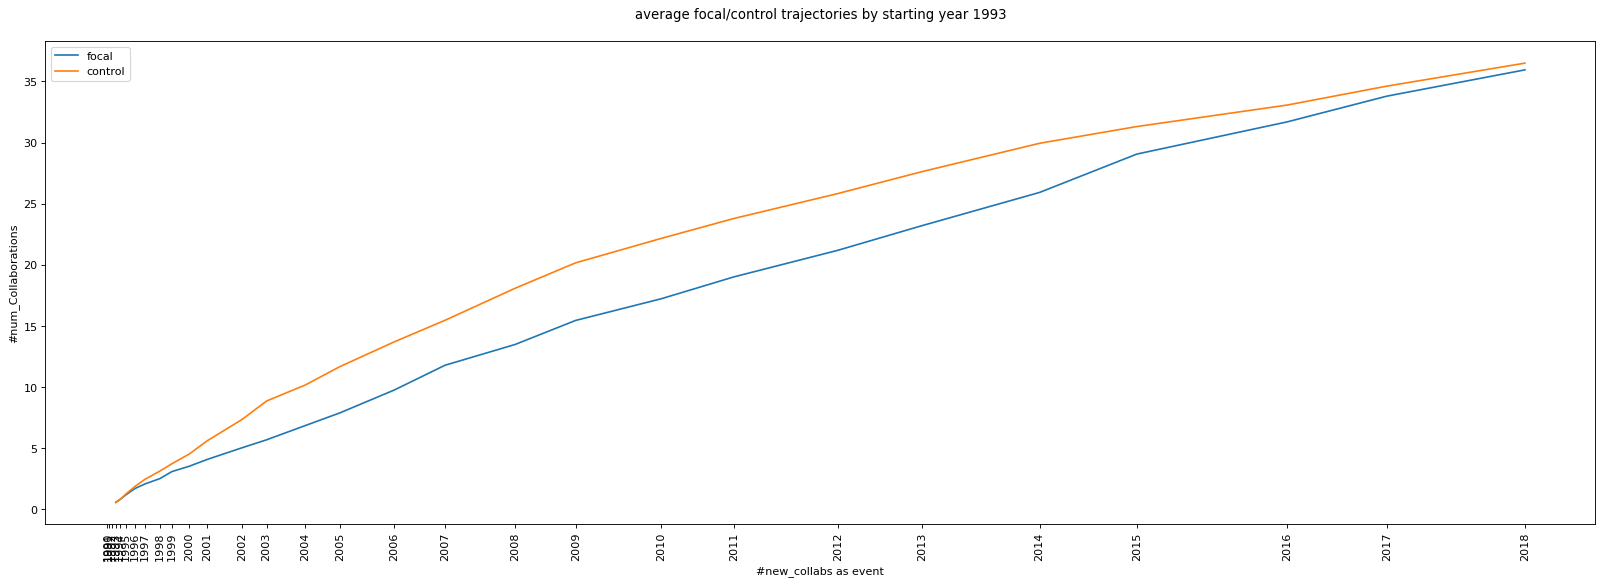

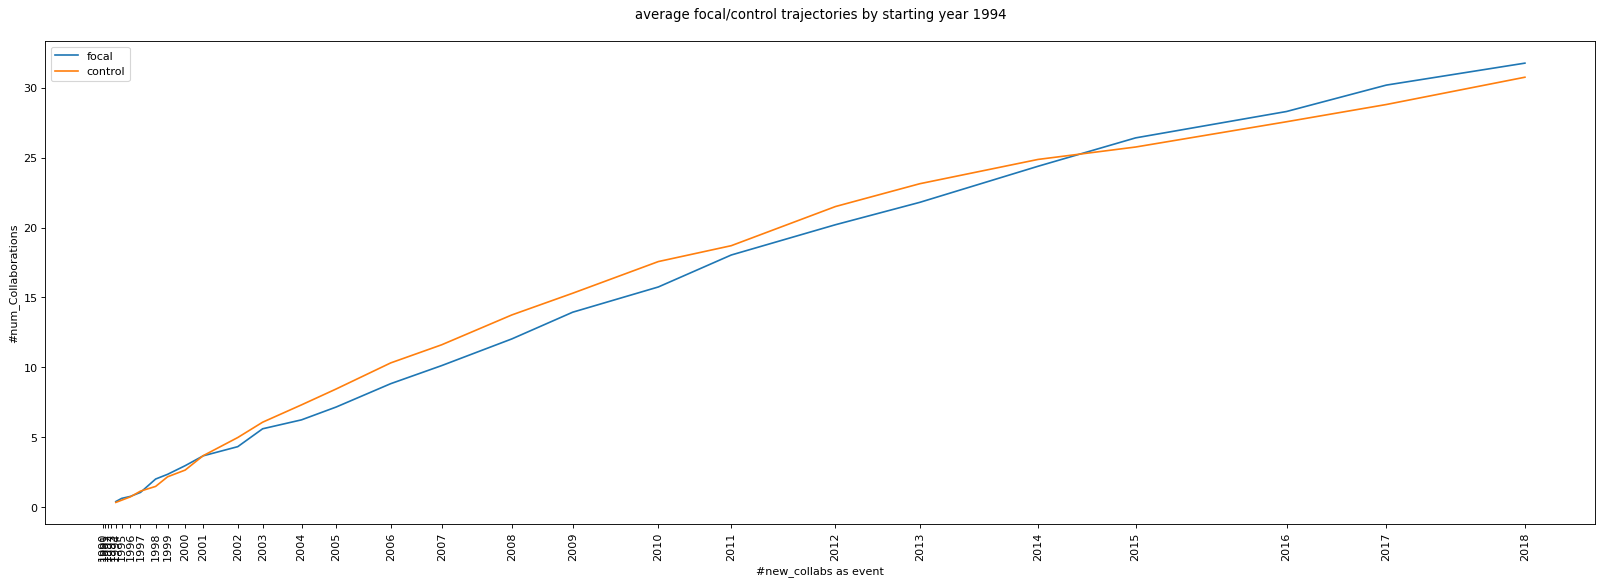

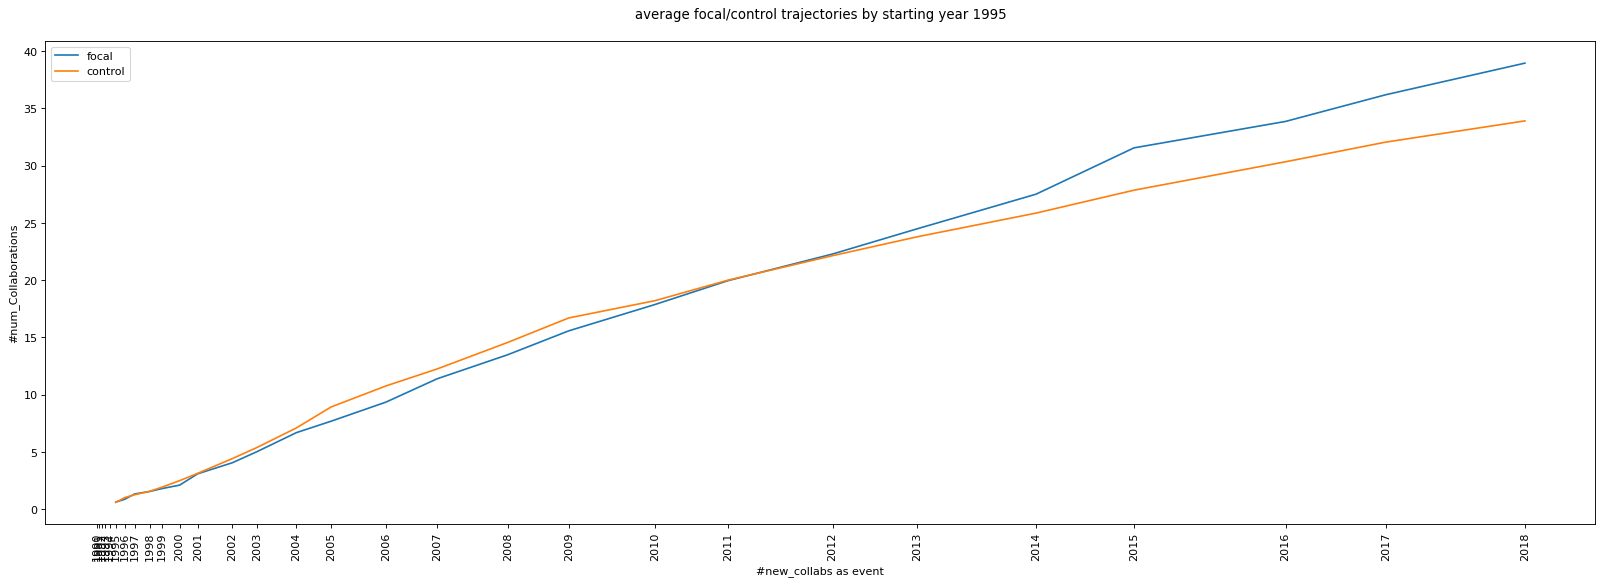

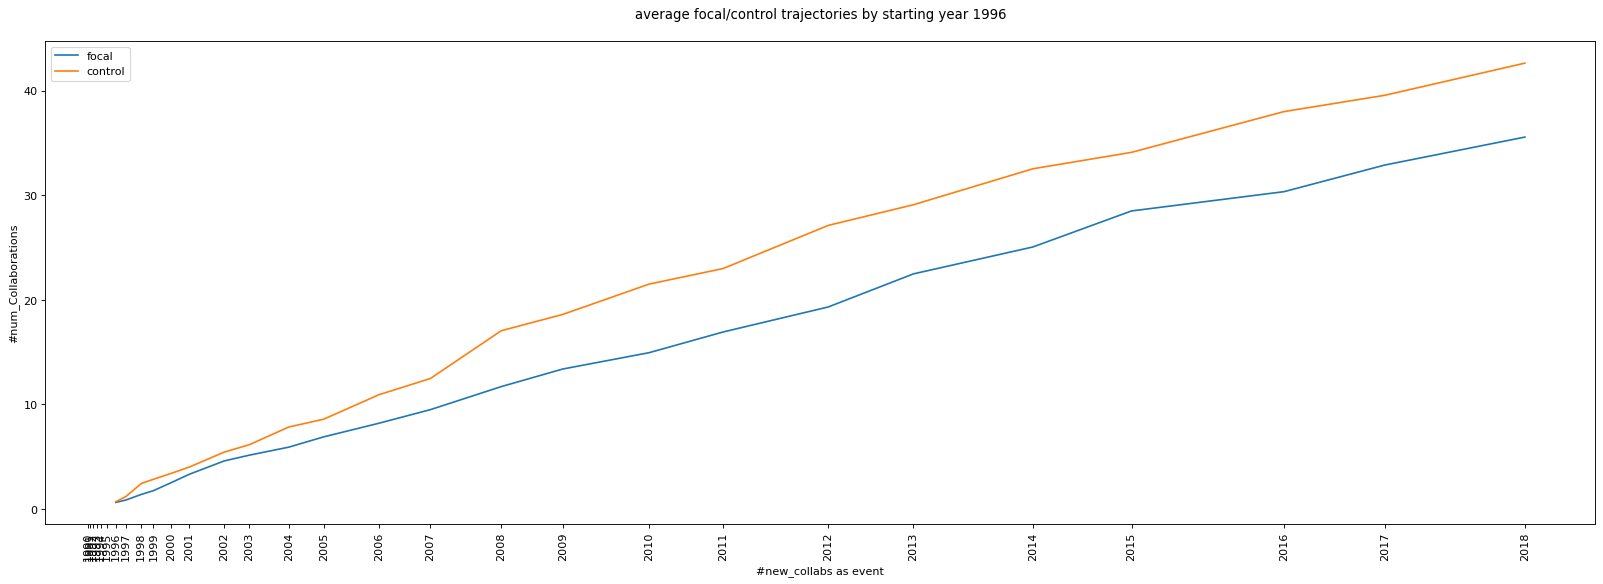

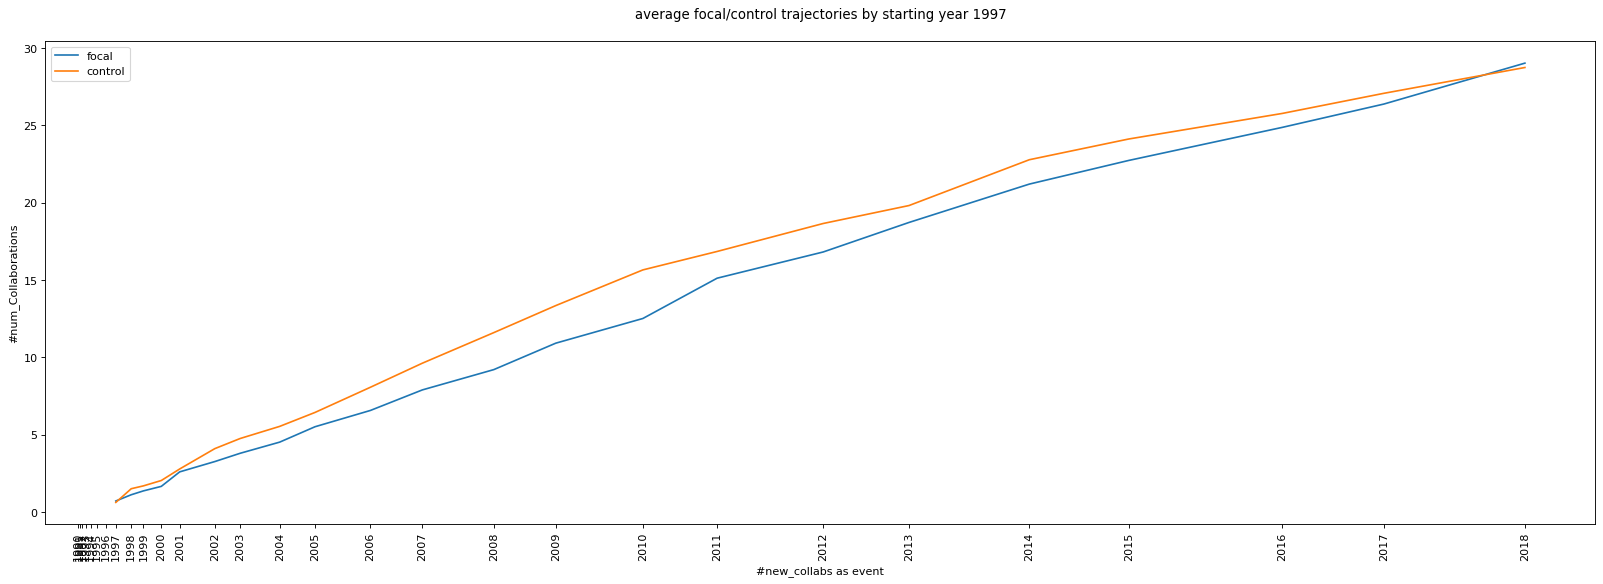

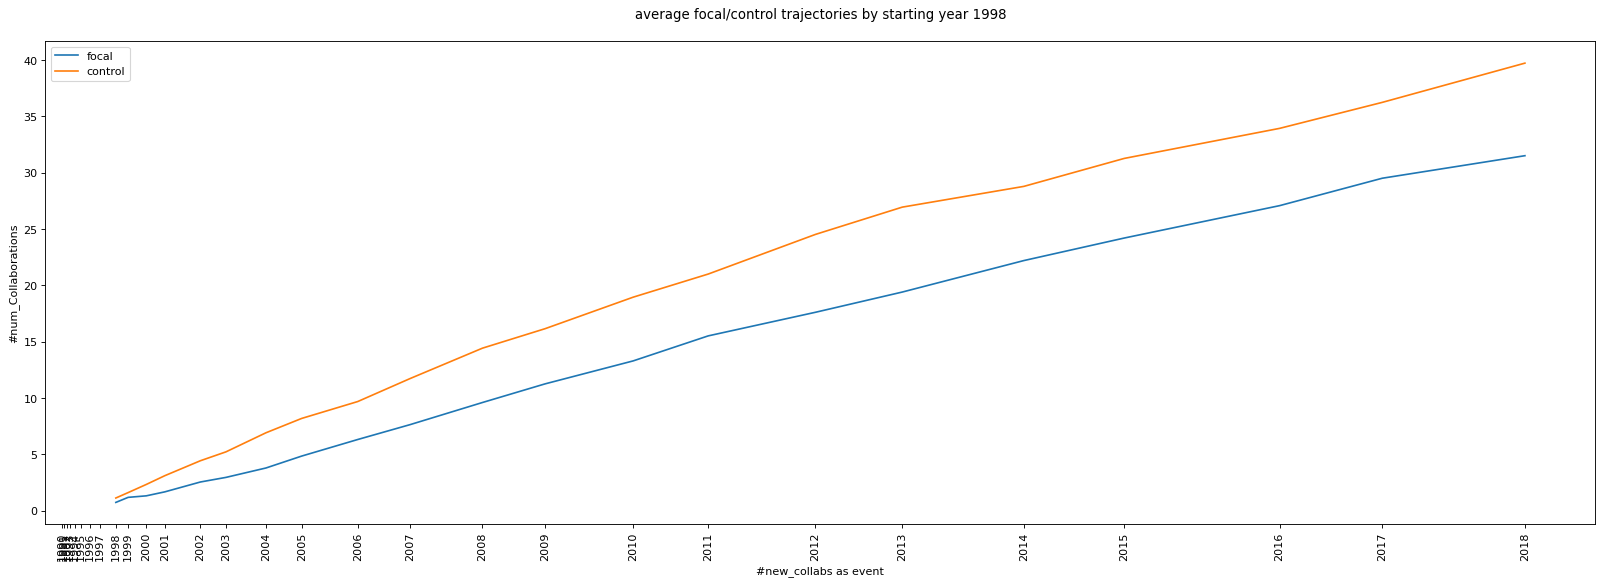

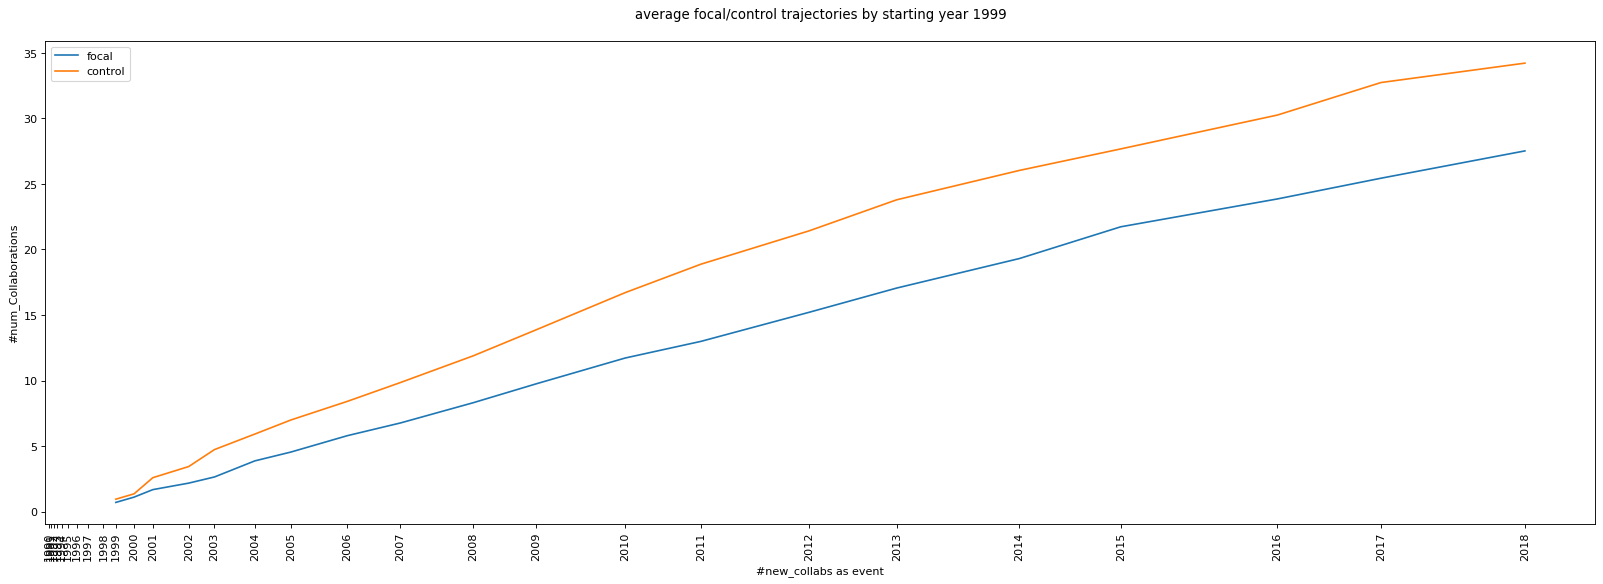

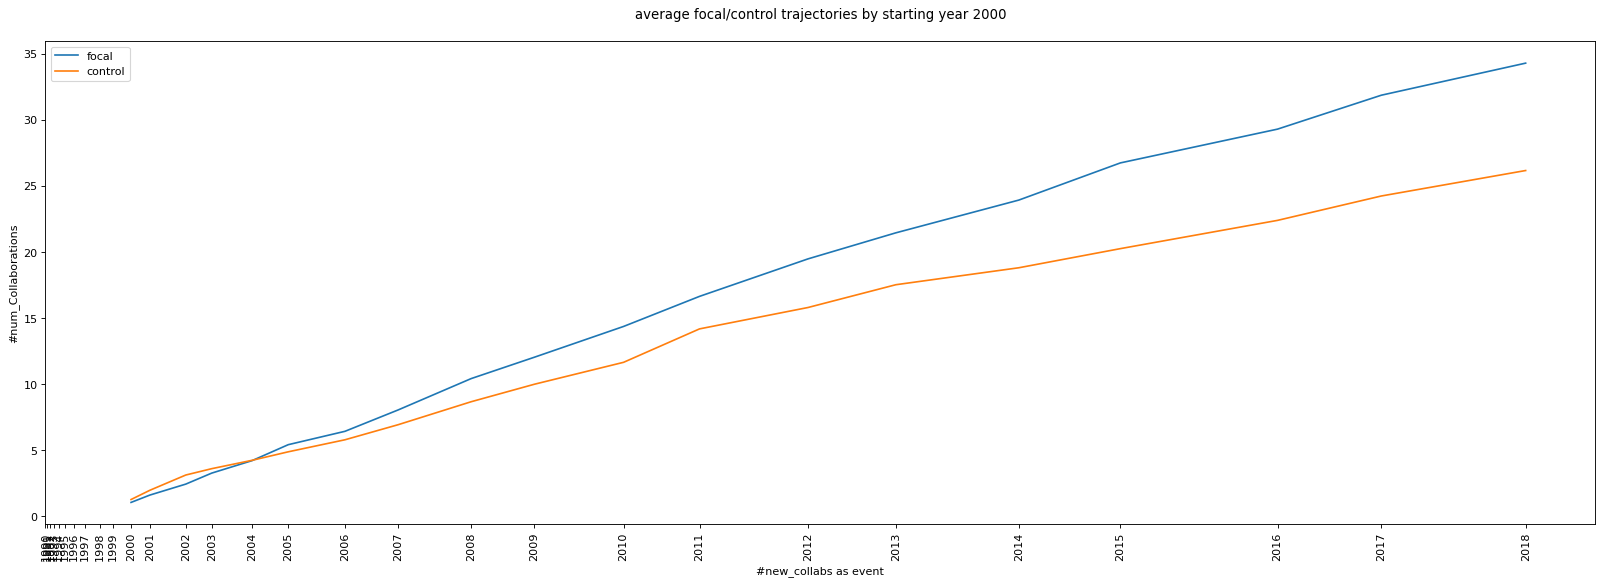

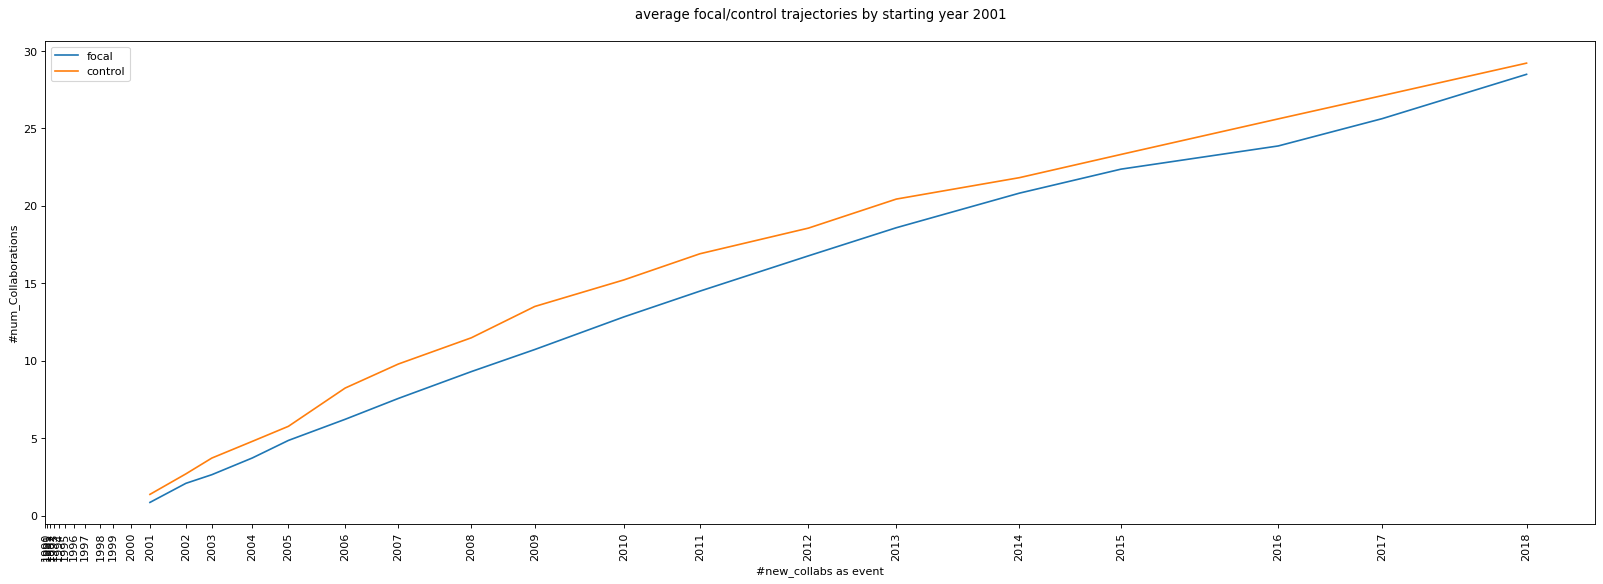

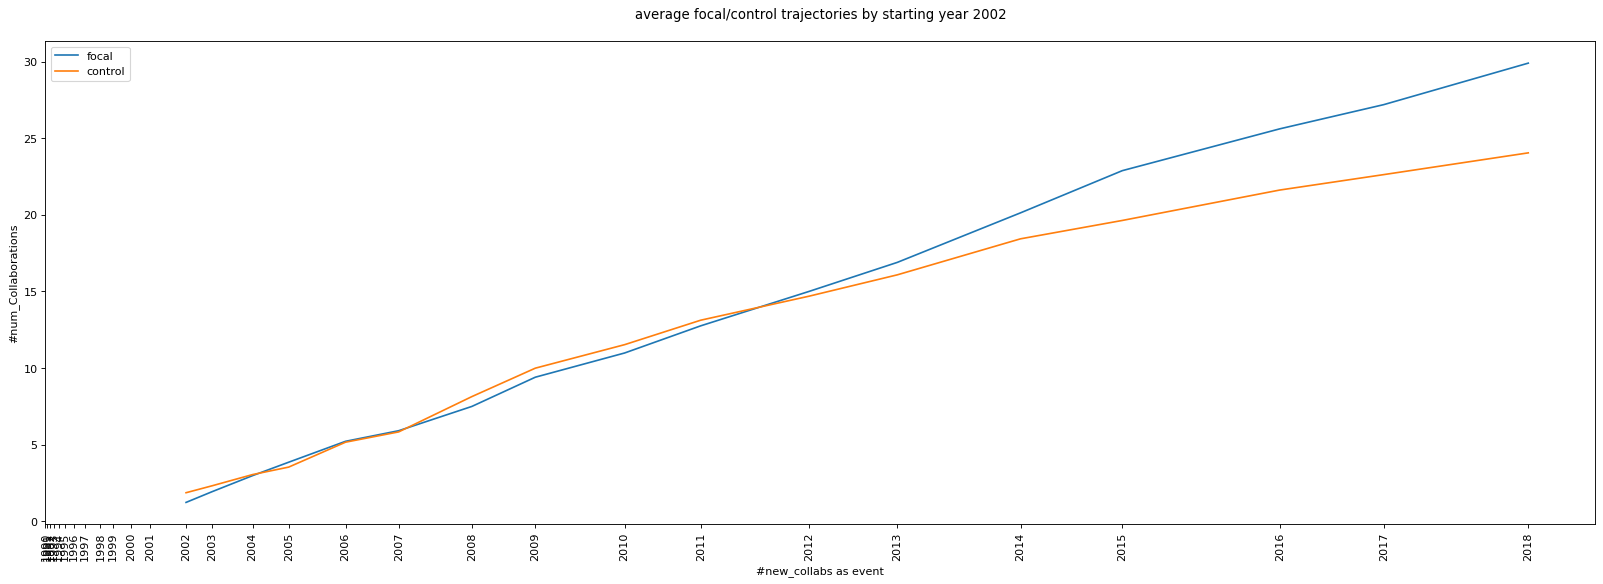

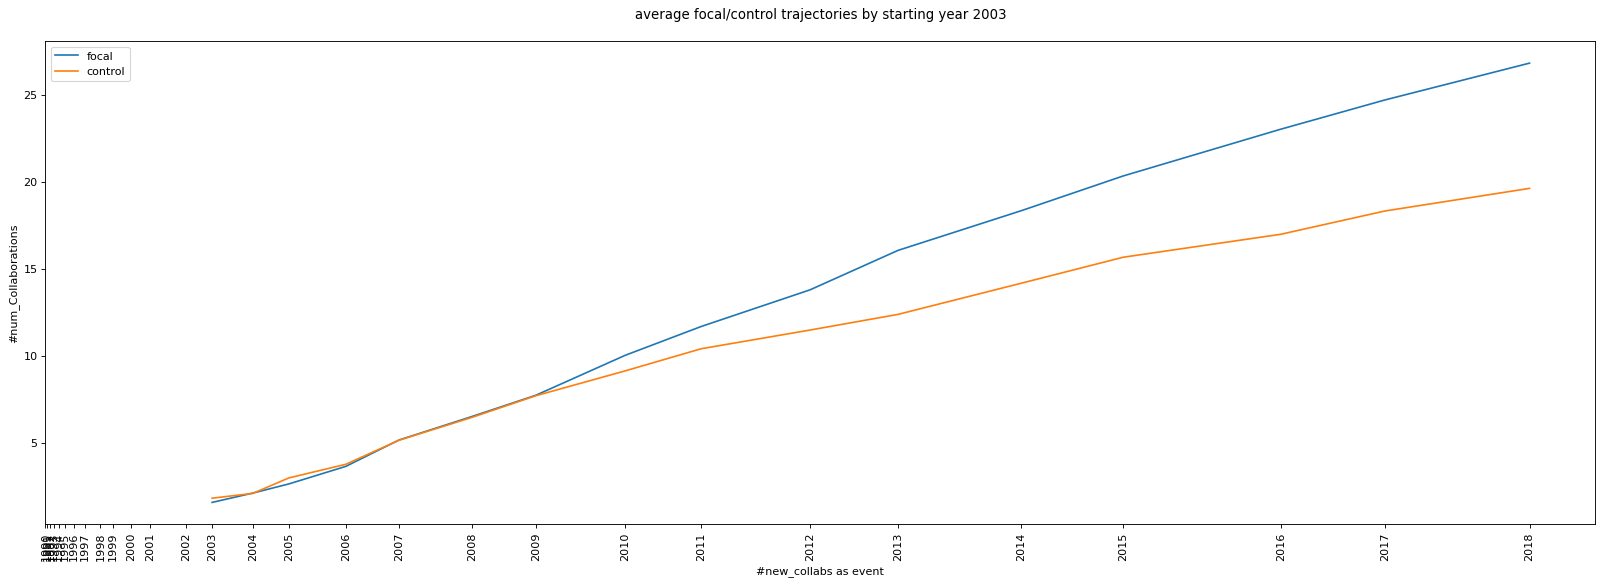

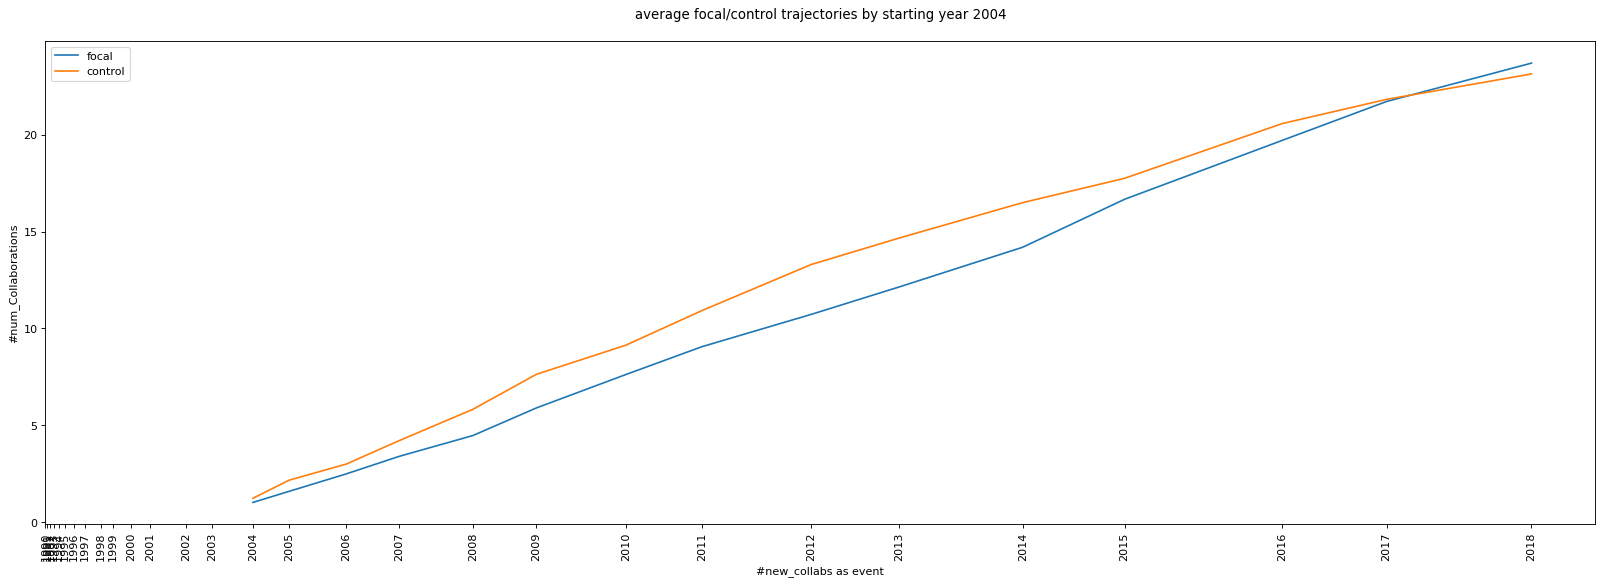

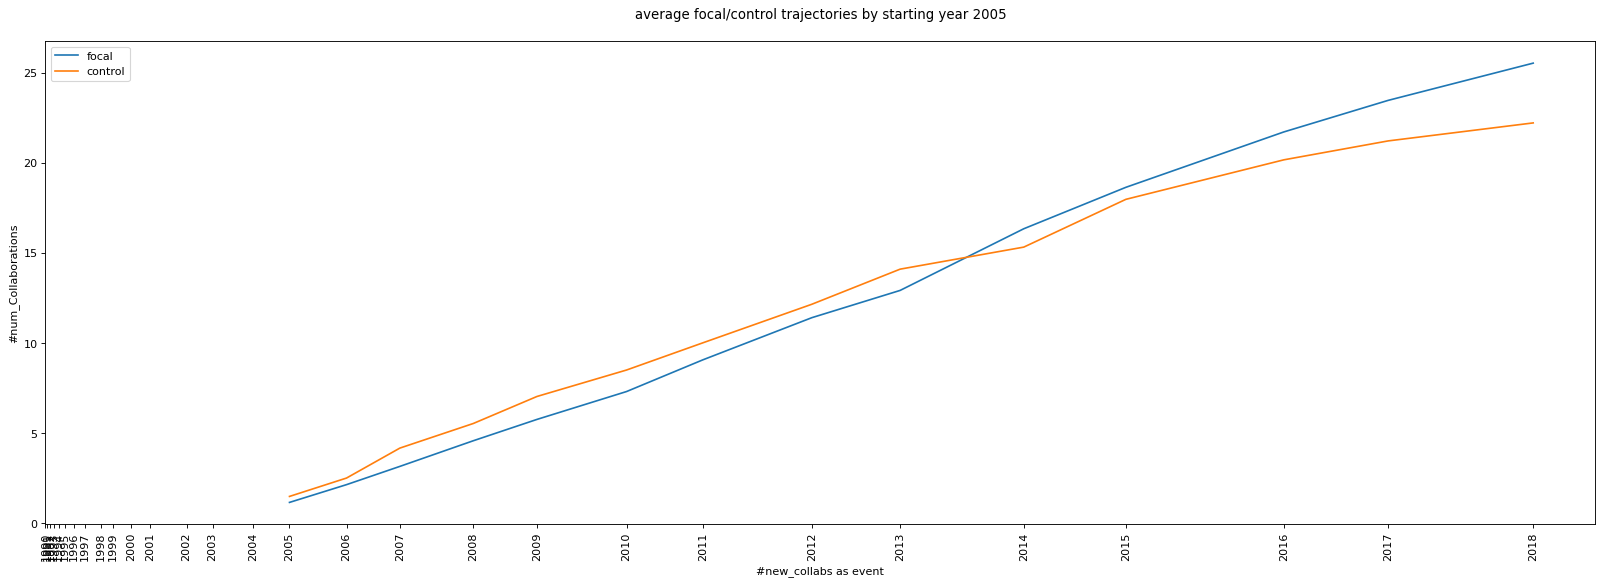

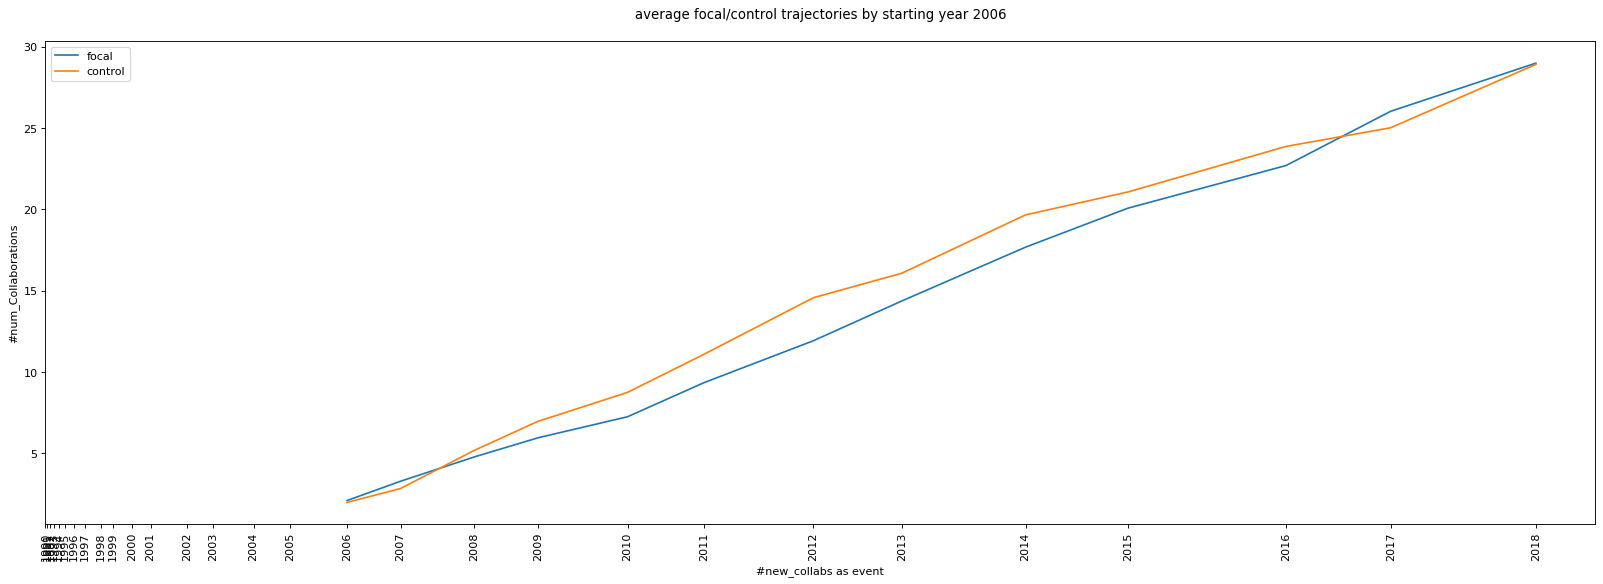

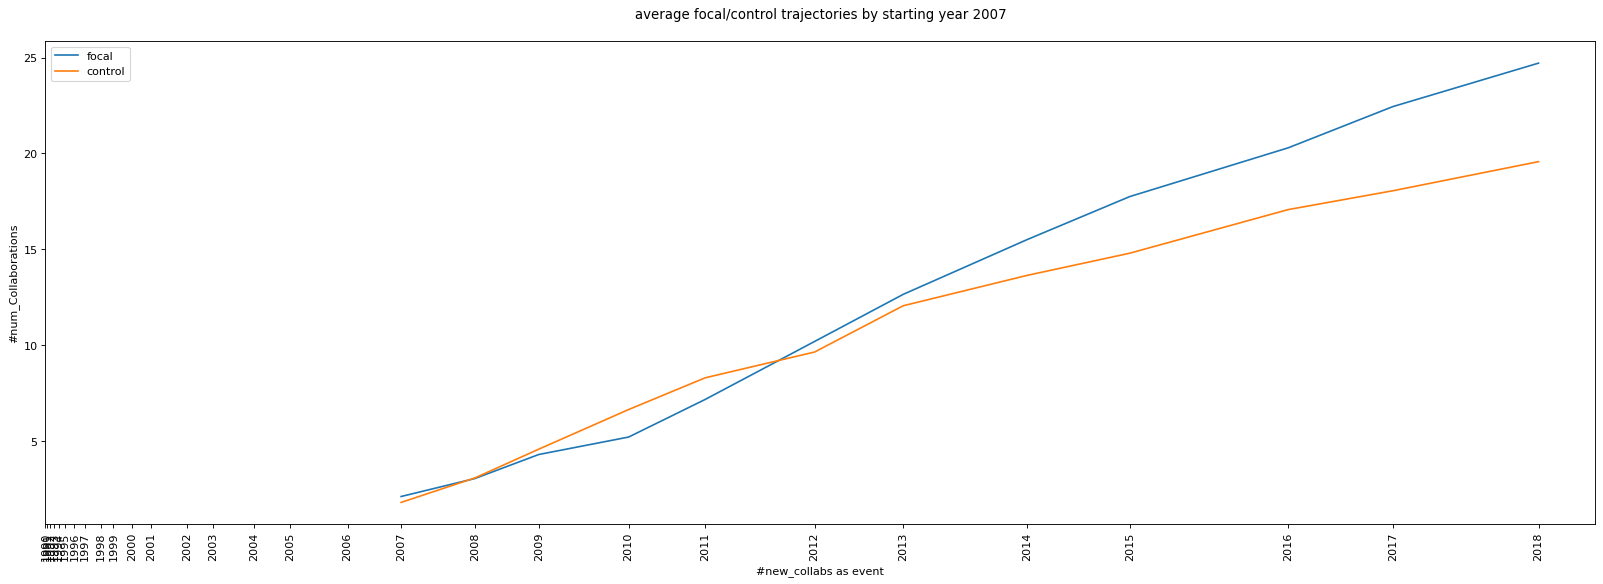

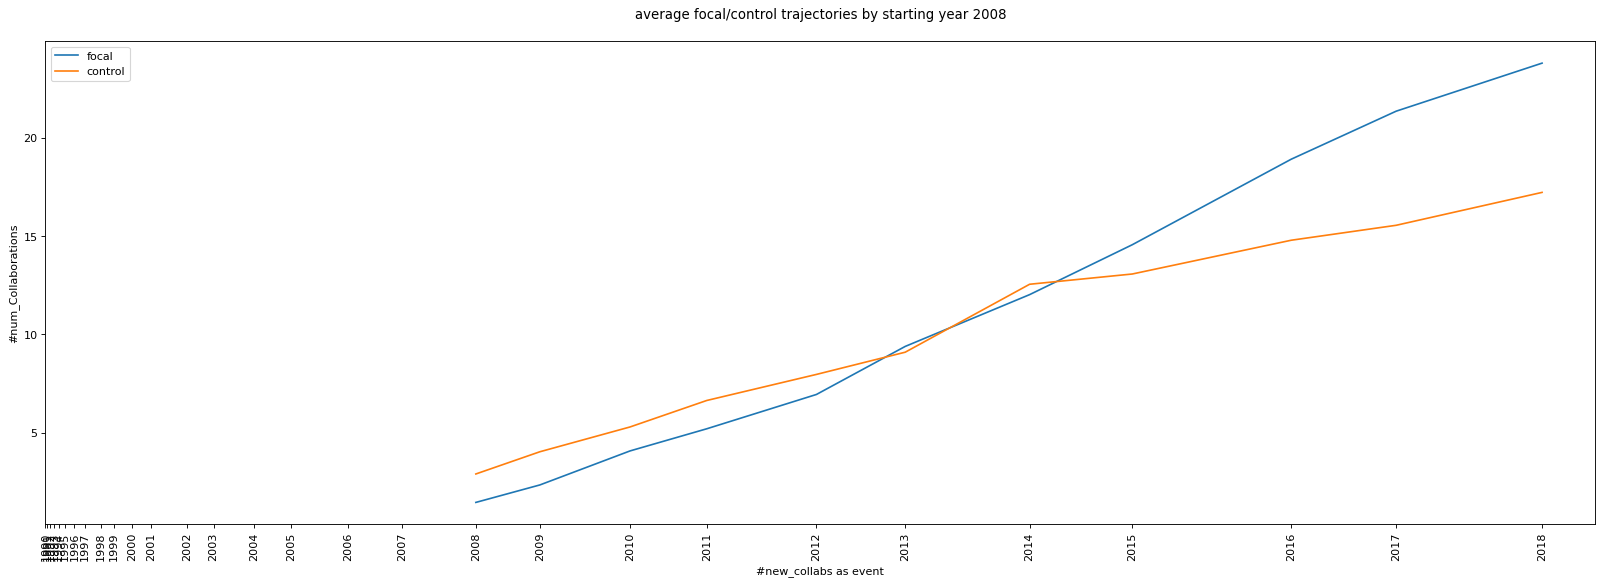

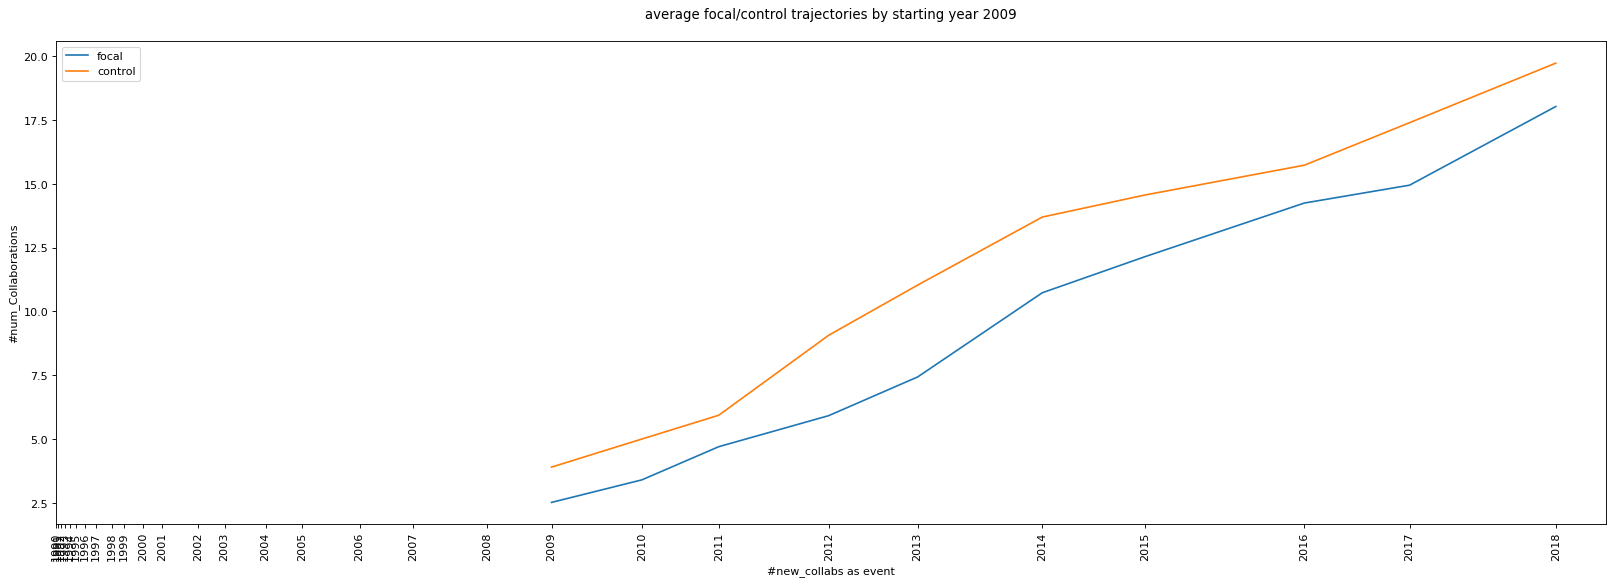

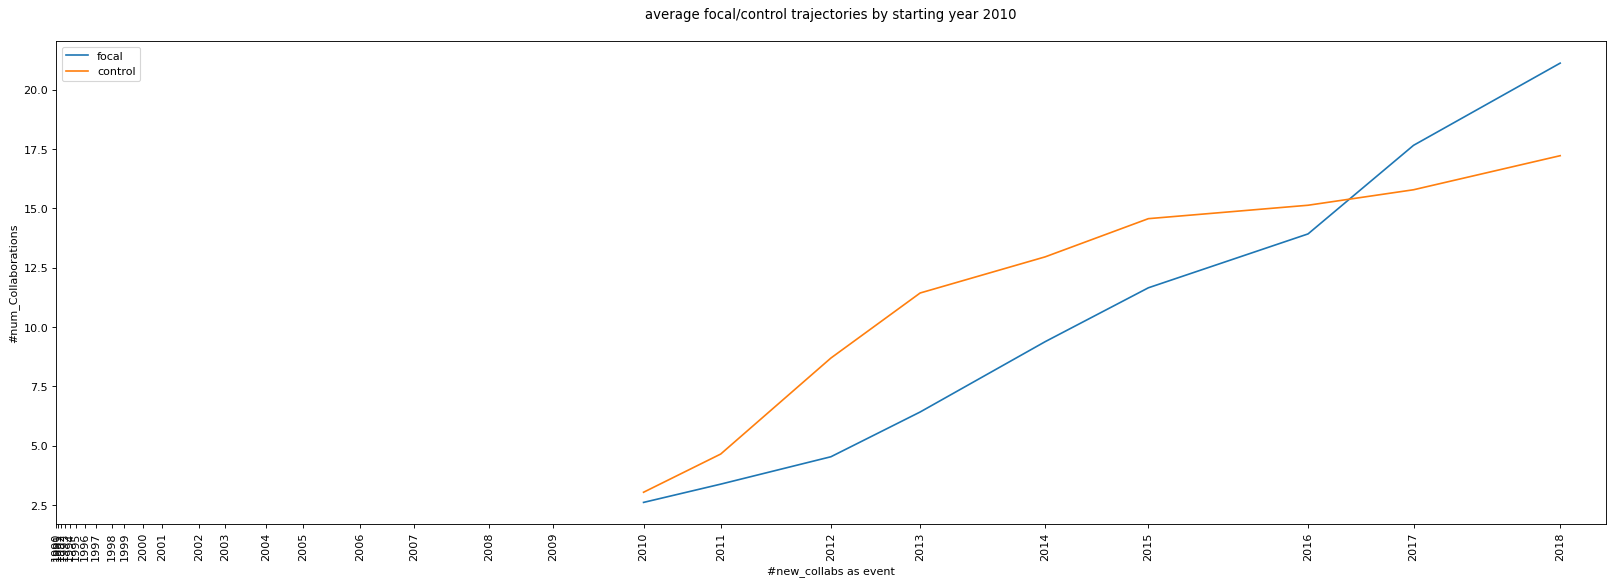

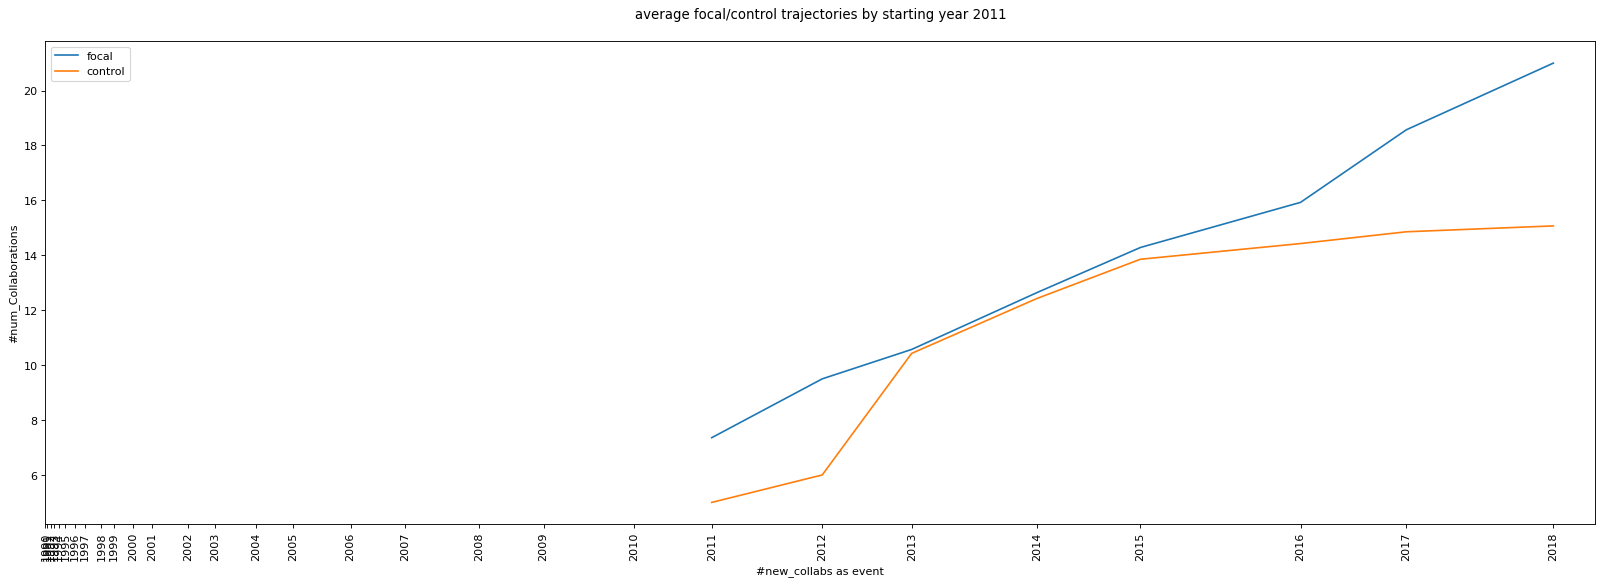

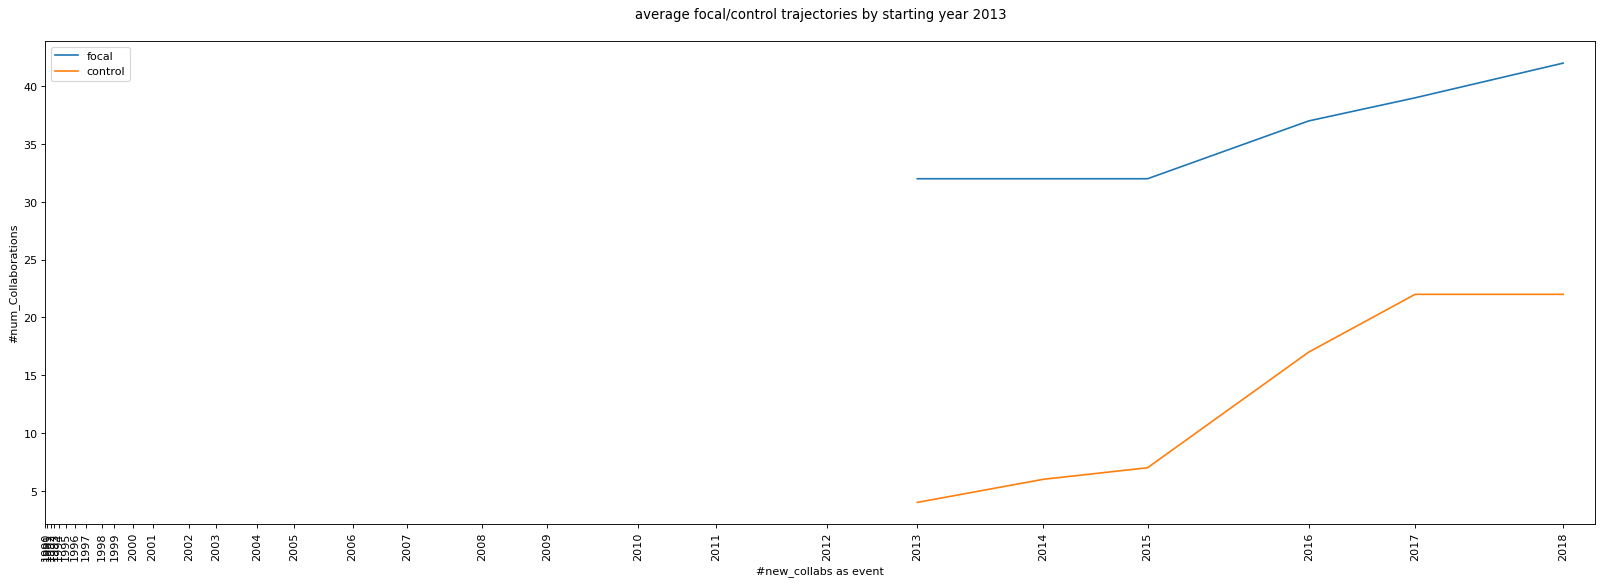

In [11]:
## plot avg focal trajectories by starting year

for start_y in YEARS:
    
    focal_x, focal_avg = get_focals_avg_trajectories(EVENTS, start_y) 
    control_x, control_avg = get_controls_avg_trajectories(EVENTS, start_y)

    if(focal_avg != [] and control_avg != []):
        plt.figure(figsize=(25, 8), dpi=80)
        plt.title("average focal/control trajectories by starting year " + start_y + "\n", fontdict = {'fontsize' : 12})
        plt.xlabel("#new_collabs as event")
        plt.ylabel("#num_Collaborations")
        plt.xticks(rotation='vertical')
        
        plt.plot(focal_x, focal_avg)
        plt.plot(control_x, control_avg)

        plt.legend(["focal", "control"], loc='upper left')
        plt.xticks(EVENTS, YEARS)
        plt.show()
